In [260]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [261]:
train_data = pd.read_csv(
    "./Dataset/Training and Testing Sets/UNSW_NB15_training-set.csv")


test_data = pd.read_csv(
    "./Dataset/Training and Testing Sets/UNSW_NB15_testing-set.csv")

In [262]:
train_data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [263]:
train_data.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

# Basic info about the datasets


In [264]:
# train_data.describe().transpose()

In [265]:
train_data.describe(include='object')

,proto,service,state,attack_cat
count,175341,175341,175341,175341
unique,133,13,9,10
top,tcp,-,INT,Normal
freq,79946,94168,82275,56000


In [266]:
print("Training Data Info:")
print(train_data.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-n

In [267]:
# Identify the data types of columns
column_data_types = train_data.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 41 Numerical Columns in dataset
There are 4 Categorical Columns in dataset


# Print dimensions of the datasets


In [268]:
print("Training Data Dimensions (rows, columns):", train_data.shape)


print("Testing Data Dimensions (rows, columns):", test_data.shape)

Training Data Dimensions (rows, columns): (175341, 45)
Testing Data Dimensions (rows, columns): (82332, 45)


# **Data Preprocessing for EDA**


In [269]:
train_data['state'] = train_data['state'].replace('-', 'others')
train_data['service'] = train_data['service'].replace('-', 'others')

In [270]:
test_data['state'] = test_data['state'].replace('-', 'others')
test_data['service'] = test_data['service'].replace('-', 'others')

# **Checking for Missing Data**

We will check if there are any missing values in both the training and testing datasets.


In [271]:
print("Missing values in Training Data:")

print(train_data.isnull().sum())

Missing values in Training Data:
id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
i

# **Checking for Redundant Data**

Check for duplicate rows in the training and testing datasets


In [272]:
print("Duplicate rows in Training Data:", train_data.duplicated().sum())

Duplicate rows in Training Data: 0


In [273]:
train_data.dropna(inplace=True)

In [274]:
train_data.isna().sum().sum()

0

In [275]:
train_data.drop(['id'], axis=1)
# train_data.drop(['id'], axis=1, inplace=True)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,others,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,others,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,others,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,others,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
175337,0.505762,tcp,others,FIN,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1
175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,Generic,1


# **Detecting Outliers**

We can look at the statistical summary of the data, and for each numerical column, we can check for unusually high or low values by identifying those beyond a certain range.


In [276]:
print("Statistical Summary of Training Data:")
display(train_data.describe().transpose())

Statistical Summary of Training Data:


,count,mean,std,min,25%,50%,75%,max
id,175341.0,8.767100e+04,5.061673e+04,1.0,43836.000000,87671.000000,1.315060e+05,1.753410e+05
dur,175341.0,1.359389e+00,6.480249e+00,0.0,0.000008,0.001582,6.680690e-01,5.999999e+01
spkts,175341.0,2.029866e+01,1.368876e+02,1.0,2.000000,2.000000,1.200000e+01,9.616000e+03
dpkts,175341.0,1.896959e+01,1.102583e+02,0.0,0.000000,2.000000,1.000000e+01,1.097400e+04
sbytes,175341.0,8.844844e+03,1.747656e+05,28.0,114.000000,430.000000,1.418000e+03,1.296523e+07
dbytes,175341.0,1.492892e+04,1.436542e+05,0.0,0.000000,164.000000,1.102000e+03,1.465555e+07
rate,175341.0,9.540619e+04,1.654010e+05,0.0,32.786140,3225.806520,1.250000e+05,1.000000e+06
sttl,175341.0,1.795470e+02,1.029400e+02,0.0,62.000000,254.000000,2.540000e+02,2.550000e+02
dttl,175341.0,7.960957e+01,1.105069e+02,0.0,0.000000,29.000000,2.520000e+02,2.540000e+02
sload,175341.0,7.345403e+07,1.883574e+08,0.0,13053.338870,879674.750000,8.888889e+07,5.988000e+09


# **Checking Unique Values Of Attributes**


In [277]:
cols = train_data.columns

for column in cols:
    print('Unique values of', column, 'with dtype',
          train_data[column].dtype, 'have total values', train_data[column].nunique(), '->\n',  train_data[column].unique())

    print()
    print('.'*100)
    print()

Unique values of id with dtype int64 have total values 175341 ->
 [     1      2      3 ... 175339 175340 175341]

....................................................................................................

Unique values of dur with dtype float64 have total values 74039 ->
 [0.121478 0.649902 1.623129 ... 3.71911  0.996503 1.557125]

....................................................................................................

Unique values of proto with dtype object have total values 133 ->
 ['tcp' 'udp' 'arp' 'ospf' 'icmp' 'igmp' 'rtp' 'ddp' 'ipv6-frag' 'cftp'
 'wsn' 'pvp' 'wb-expak' 'mtp' 'pri-enc' 'sat-mon' 'cphb' 'sun-nd' 'iso-ip'
 'xtp' 'il' 'unas' 'mfe-nsp' '3pc' 'ipv6-route' 'idrp' 'bna' 'swipe'
 'kryptolan' 'cpnx' 'rsvp' 'wb-mon' 'vmtp' 'ib' 'dgp' 'eigrp' 'ax.25'
 'gmtp' 'pnni' 'sep' 'pgm' 'idpr-cmtp' 'zero' 'rvd' 'mobile' 'narp' 'fc'
 'pipe' 'ipcomp' 'ipv6-no' 'sat-expak' 'ipv6-opts' 'snp' 'ipcv'
 'br-sat-mon' 'ttp' 'tcf' 'nsfnet-igp' 'sprite-rpc' 'aes-sp3-d'

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

- Observed that some values are repeated due to their wrong format , for example in column 'ct_ftp_cmd' the unique values are [0 ' ' '1' 1 '0' 2 8 '2' 4 5 3 6 '4'] in which we see that same values reapeated and treated as differently
- In column 'is_ftp_login' unique values are [0. 1. 2. 4.] which is not correct because according to given NB15_features.csv this column is a binary column


## **Handling ct_ftp_cmd**


In [278]:
train_data['ct_ftp_cmd'] = train_data['ct_ftp_cmd'].astype('str')

In [279]:
train_data['ct_ftp_cmd'].dtype

dtype('O')

In [280]:
train_data['ct_ftp_cmd'].unique()

array(['0', '1', '2', '4'], dtype=object)

In [281]:
train_data['ct_ftp_cmd'] = train_data['ct_ftp_cmd'].replace(' ', '0')

In [282]:
train_data['ct_ftp_cmd'] = train_data['ct_ftp_cmd'].astype('int')

# **Handling is_ftp_login**


In [283]:
def convert_to_binary(df, column):
    df[column] = (df[column] > 0).astype(int)
    return df


column = 'is_ftp_login'
convert_to_binary(train_data, column)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,others,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,others,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,others,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,others,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,others,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


# **Class Imbalance**

We will check for class imbalance using the 'label' column, which seems to represent whether a record is normal or an attack.

Additionally, we'll inspect the 'attack_cat' column to check the distribution of attack types.


Examine the Distribution of Attack Classes and Normal Class

We have a column that labels each record as either a "normal" instance or one of several 9 attack types (e.g., DoS, Probe, etc.).

We have examined the distribution of these categories above.


Class distribution in Training Data ('label' column):
        Count  Percentage (%)
label                        
1      119341       68.062233
0       56000       31.937767


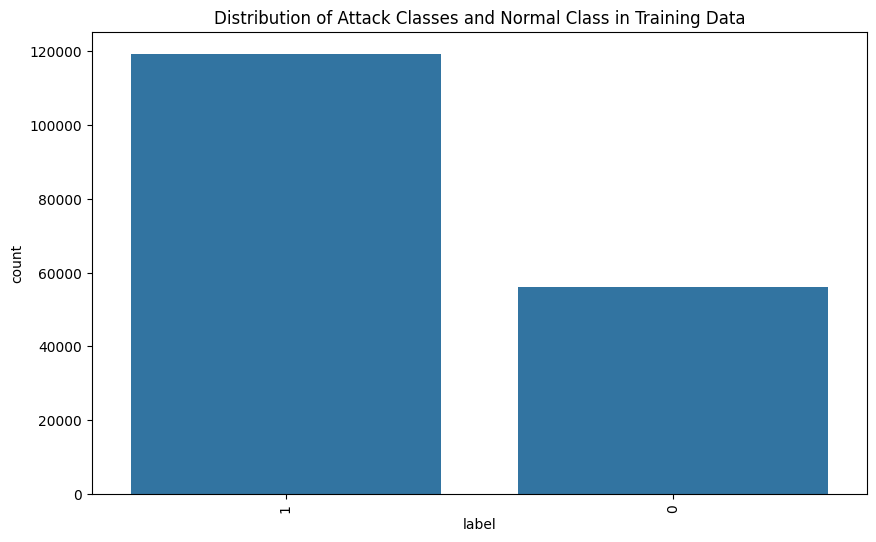

In [284]:
# Check class distribution in the training set
print("Class distribution in Training Data ('label' column):")
lebel_counts = train_data['label'].value_counts()
lebel_percentages = train_data['label'].value_counts(normalize=True) * 100

lebel_distribution = pd.DataFrame(
    {
        'Count': lebel_counts,
        'Percentage (%)': lebel_percentages
    }
)
print(lebel_distribution)


plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='label',
              order=train_data['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Attack Classes and Normal Class in Training Data')
plt.show()

In [285]:
fig = px.pie(lebel_counts,
             values=lebel_counts.values,
             names=lebel_counts.index,
             title='Distribution of Label')
fig.show()

Check for Imbalances Between Different Attack Classes

If the label column contains both normal and attack classes, we will want to check how many samples are available for each specific attack class.

This can help identify if some attack classes are underrepresented or overrepresented.



Attack categories distribution in Training Data ('attack_cat' column):
                Count  Percentage (%)
attack_cat                           
Normal          56000       31.937767
Generic         40000       22.812691
Exploits        33393       19.044605
Fuzzers         18184       10.370649
DoS             12264        6.994371
Reconnaissance  10491        5.983198
Analysis         2000        1.140635
Backdoor         1746        0.995774
Shellcode        1133        0.646169
Worms             130        0.074141


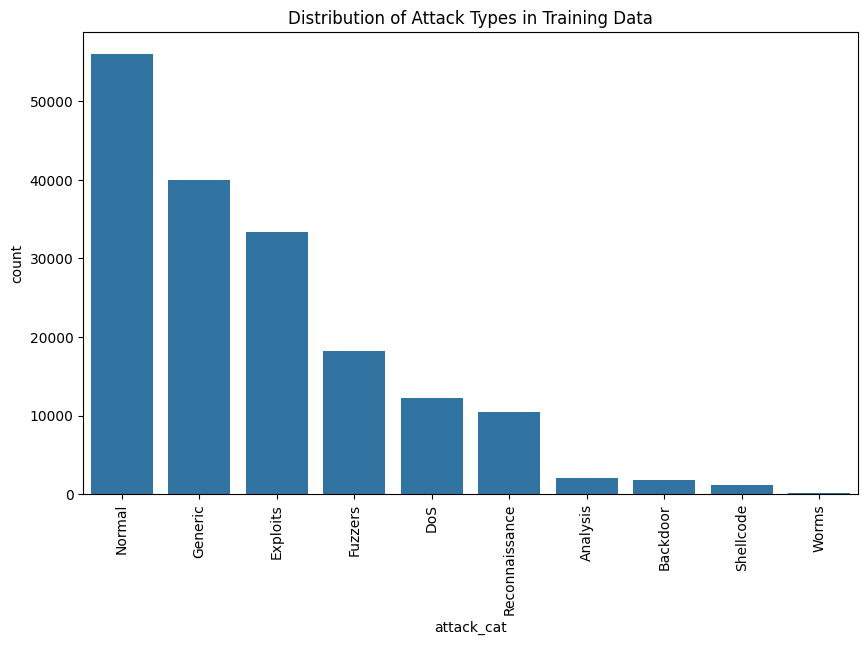

In [286]:
# Check attack categories distribution in the training set
print("\nAttack categories distribution in Training Data ('attack_cat' column):")
attack_counts = train_data['attack_cat'].value_counts()
attack_percentages = train_data['attack_cat'].value_counts(
    normalize=True) * 100

attack_distribution = pd.DataFrame(
    {
        'Count': attack_counts,
        'Percentage (%)': attack_percentages
    }
)
print(attack_distribution)


# Plot attack type distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='attack_cat',
              order=train_data['attack_cat'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Attack Types in Training Data')
plt.show()

# **Most Used Service By Attack Category**


In [287]:
df_attacks_cat_services = train_data[(train_data['attack_cat'] != 'normal')].groupby(
    ['attack_cat', 'service']).size().reset_index(name='Count')

df_attacks_cat_services.reset_index()

,index,attack_cat,service,Count
0,0,Analysis,http,558
1,1,Analysis,others,1436
2,2,Analysis,smtp,6
3,3,Backdoor,ftp,5
4,4,Backdoor,http,83
...,...,...,...,...
59,59,Reconnaissance,smtp,5
60,60,Reconnaissance,snmp,60
61,61,Shellcode,others,1133
62,62,Worms,http,114


In [288]:
fig = make_subplots(rows=3,
                    cols=3,
                    subplot_titles=('Category: Analysis',
                                    'Category: Backdoor',
                                    'Category: DoS',
                                    'Category: Exploits',
                                    'Category: Fuzzers',
                                    'Category: Generic',
                                    'Category: Reconnaissance',
                                    'Category: Shellcode',
                                    'Category: Worms'
                                    )
                    )


# Create a list of attack categories to loop through
categories = ['Analysis',
              'Backdoor',
              'DoS',
              'Exploits',
              'Fuzzers',
              'Generic',
              'Reconnaissance',
              'Shellcode',
              'Worms'
              ]


# Define row and column positions for each plot
positions = [
    (1, 1),
    (1, 2),
    (1, 3),
    (2, 1),
    (2, 2),
    (2, 3),
    (3, 1),
    (3, 2),
    (3, 3)
]


# Loop through the categories and create a bar plot for each one
for i, category in enumerate(categories):
    # Filter the dataframe for each attack category
    df_filtered = df_attacks_cat_services[df_attacks_cat_services['attack_cat'] == category]

    fig.add_trace(go.Bar(x=df_filtered['service'],
                         y=df_filtered['Count'],
                         name=category,
                         marker_color=px.colors.qualitative.Plotly[i]
                         ),
                  row=positions[i][0],
                  col=positions[i][1]
                  )


fig.update_layout(height=900,
                  width=900,
                  title_text="Service Counts by Attack Categories",
                  showlegend=False
                  )


fig.update_xaxes(tickangle=90)


fig.show()

# **Top Protocols Used By Attack Category**


In [289]:
df_attacks_cat_proto = train_data[(train_data['attack_cat'] != 'normal')].groupby(
    ['attack_cat', 'proto']).size().reset_index(name='Count')

In [290]:
fig = make_subplots(rows=3,
                    cols=3,
                    subplot_titles=('Category: Analysis',
                                    'Category: Backdoor',
                                    'Category: DoS',
                                    'Category: Exploits',
                                    'Category: Fuzzers',
                                    'Category: Generic',
                                    'Category: Reconnaissance',
                                    'Category: Shellcode',
                                    'Category: Worms'
                                    )
                    )


categories = [
    'Analysis',
    'Backdoor',
    'DoS',
    'Exploits',
    'Fuzzers',
    'Generic',
    'Reconnaissance',
    'Shellcode',
    'Worms'
]


positions = [
    (1, 1),
    (1, 2),
    (1, 3),
    (2, 1),
    (2, 2),
    (2, 3),
    (3, 1),
    (3, 2),
    (3, 3)
]

# Loop through the categories and create a bar plot for each one (top 5 protocols)
for i, category in enumerate(categories):
    # Filter the dataframe for each attack category and take the top 5 protocols
    df_filtered = df_attacks_cat_proto[df_attacks_cat_proto['attack_cat'] == category][:5]

    fig.add_trace(go.Bar(
        x=df_filtered['proto'],
        y=df_filtered['Count'],
        name=category,
        marker_color=px.colors.qualitative.Plotly[i]
    ),
        row=positions[i][0],
        col=positions[i][1]
    )


fig.update_layout(height=900,
                  width=900,
                  title_text="Top 5 Protocols by Attack Categories",
                  showlegend=False
                  )


fig.update_xaxes(tickangle=90)


fig.show()

## **Observation**

- The distribution of attacks types is not uniform, most of them are generic.
- The distributions of source bytes sent by attack type follow a similar trend, there are not noticeable differences between them.
- Most of the attacks use HTTP service (not considering 'other' category).
- 3pc and argus are protocols commonly used in distributed computing environments. Both are used by the majority of attacking types along with TCP and UDP


# **Correlation matrix**


## **Checking Highly Correlated Features**


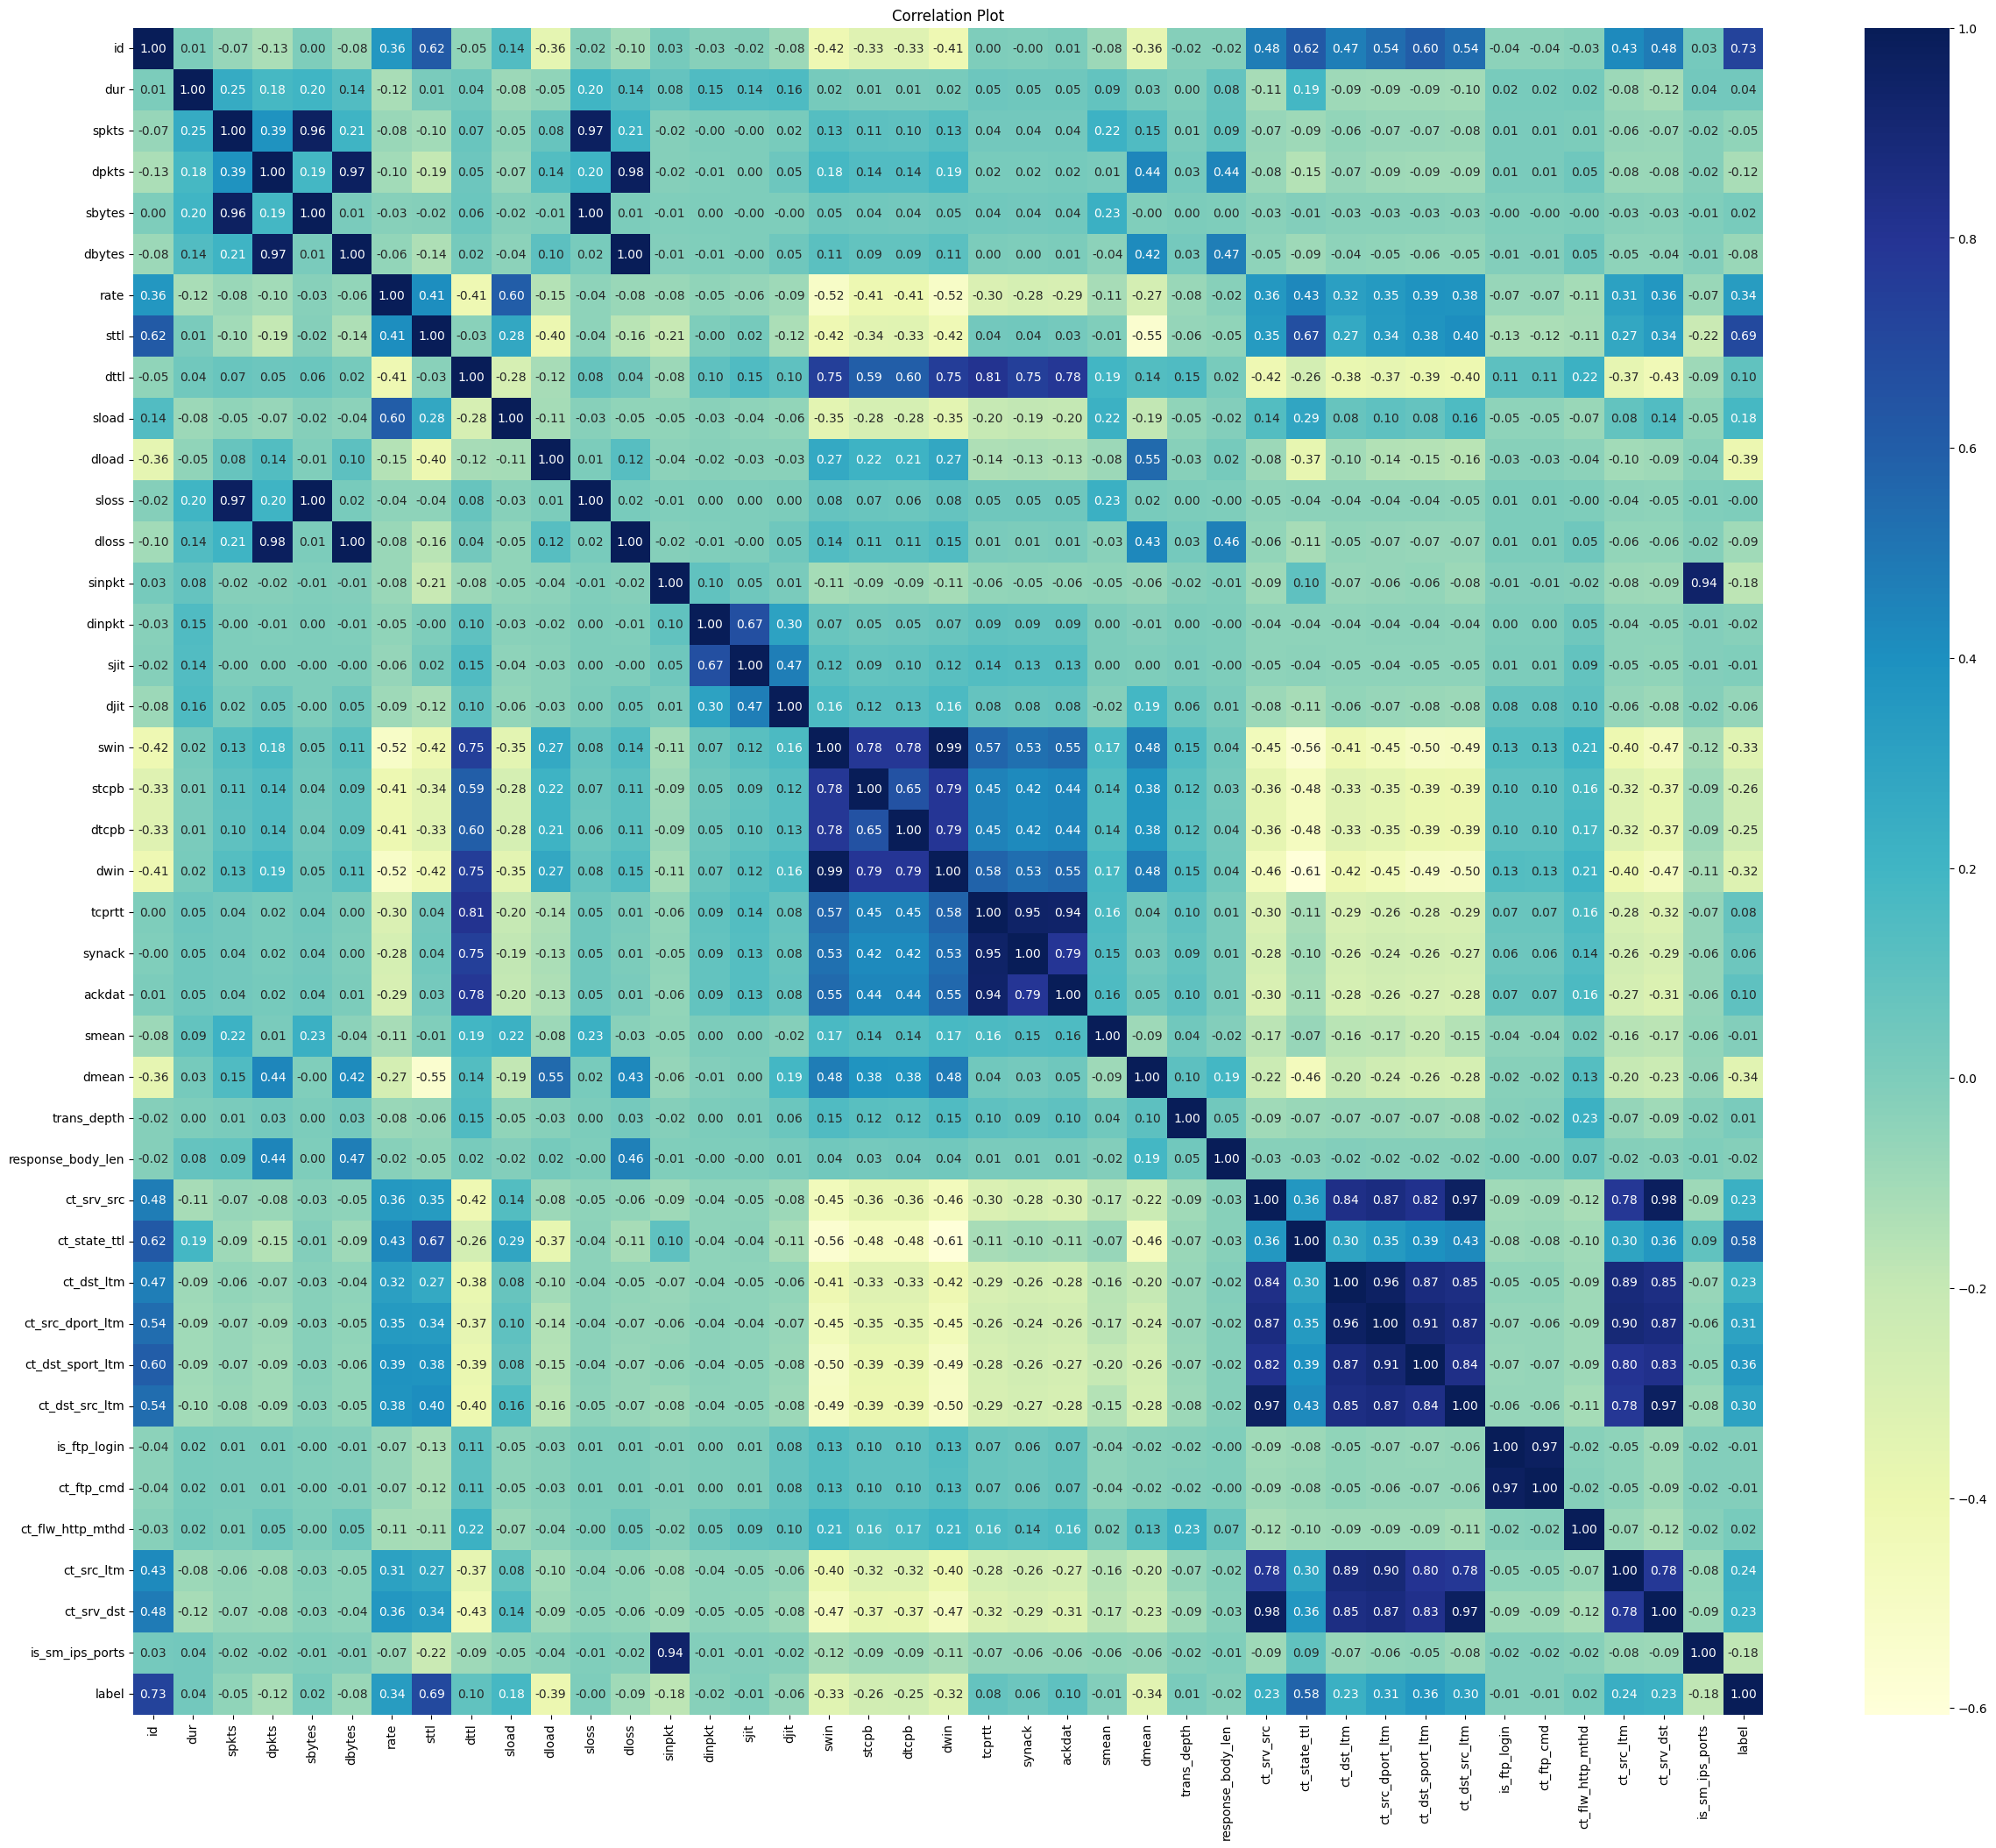

In [ ]:
# Select only numeric columns
numeric_data = train_data.select_dtypes(include=[float, int])

# Plot the correlation heatmap
plt.figure(figsize=(30, 25))
plt.title("Correlation Plot")
sns.heatmap(numeric_data.corr(), cmap='YlGnBu', annot=True, fmt=".2f")
plt.show()

Highly Correlated Features with Variances:
           Feature 1         Feature 2  Correlation  Variance Feature 1  \
0             sbytes             spkts     0.963791        3.054303e+10   
1             dbytes             dpkts     0.971907        2.063653e+10   
2              sloss             spkts     0.971069        4.356668e+03   
3              sloss            sbytes     0.996109        4.356668e+03   
4              dloss             dpkts     0.978636        2.780769e+03   
5              dloss            dbytes     0.996504        2.780769e+03   
6               dwin              swin     0.990140        1.610019e+04   
7             synack            tcprtt     0.949468        1.883541e-03   
8             ackdat            tcprtt     0.941760        1.640765e-03   
9   ct_src_dport_ltm        ct_dst_ltm     0.962052        6.475589e+01   
10  ct_dst_sport_ltm  ct_src_dport_ltm     0.906793        3.344986e+01   
11    ct_dst_src_ltm        ct_srv_src     0.967138      

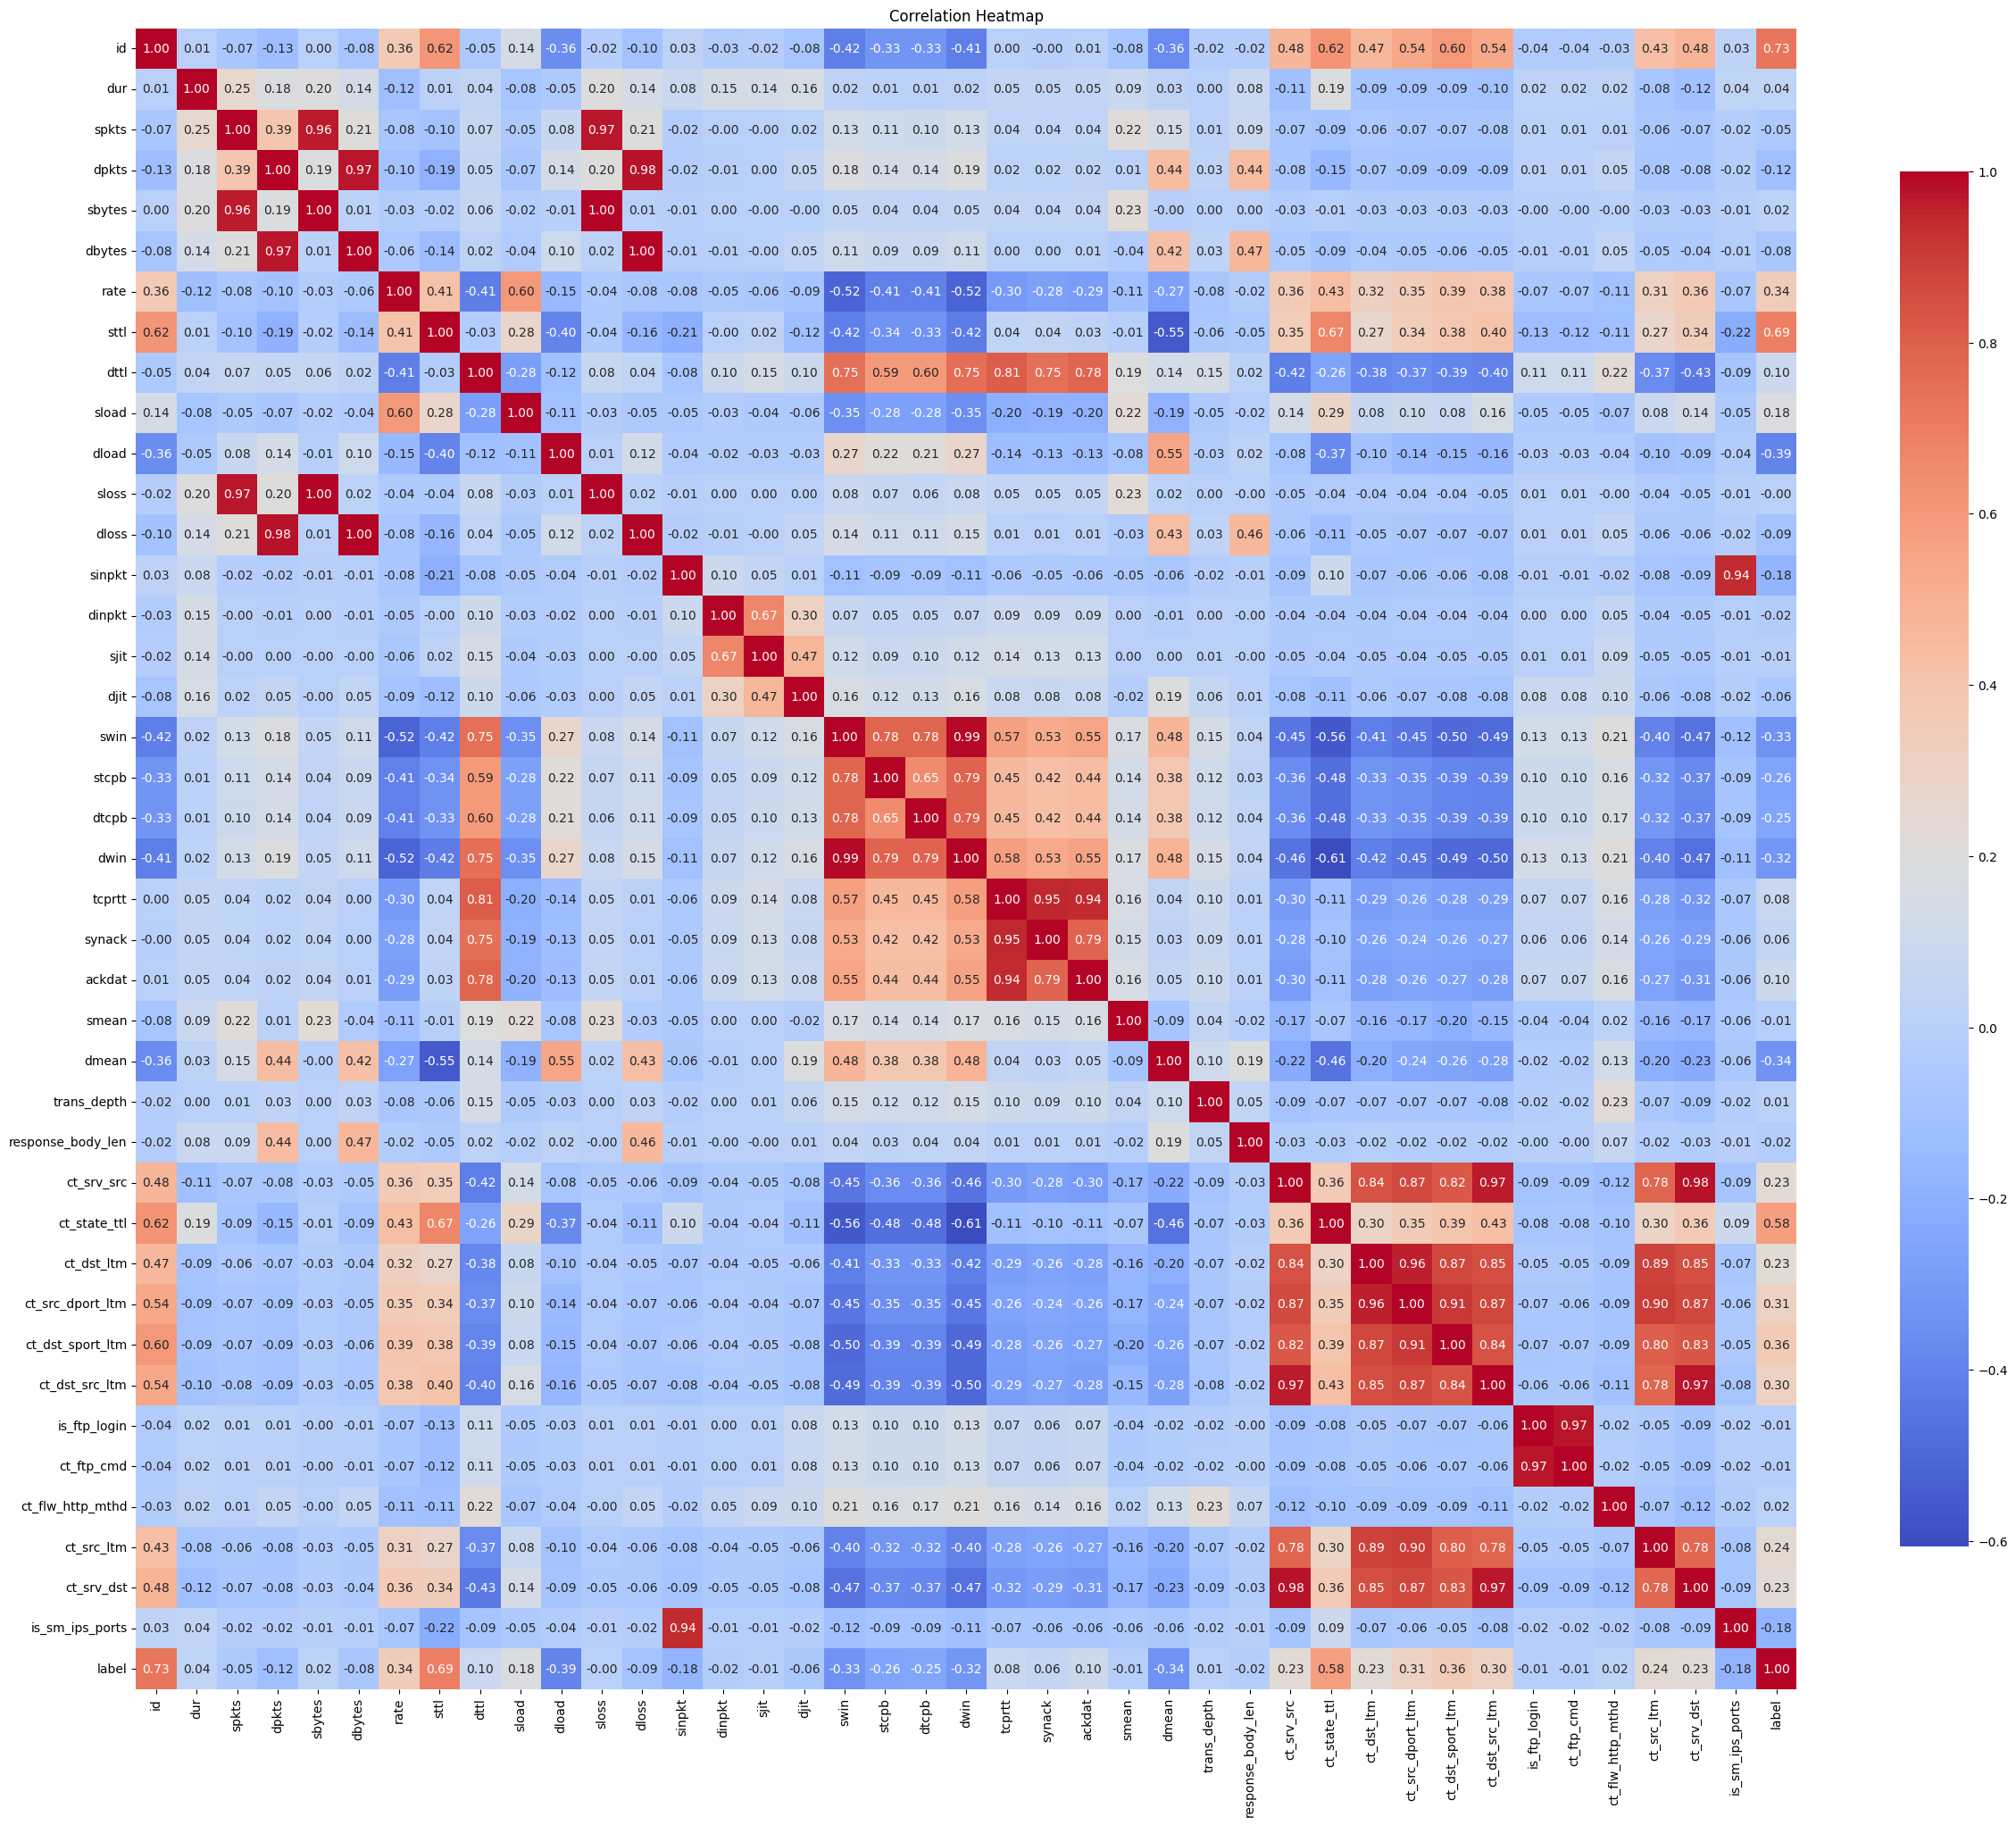

In [ ]:
# Step 1: Select only numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
numeric_data = train_data[numeric_columns]


# Step 2: Compute the correlation matrix
corr_matrix = numeric_data.corr()


# Step 3: Identify highly correlated features
threshold = 0.9
high_corr_pairs = []


# Calculate the variance for each numeric column
feature_variances = numeric_data.var()


# Loop through the correlation matrix to find highly correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append(
                (corr_matrix.columns[i],
                 corr_matrix.columns[j],
                 corr_matrix.iloc[i, j],
                 feature_variances[corr_matrix.columns[i]],
                 feature_variances[corr_matrix.columns[j]]
                 )
            )


# Convert to DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_pairs,
                            columns=['Feature 1', 'Feature 2', 'Correlation', 'Variance Feature 1', 'Variance Feature 2'])


# Print highly correlated features along with variances
print("Highly Correlated Features with Variances:")
print(high_corr_df)


# Step 4: Visualize the Correlation Matrix
plt.figure(figsize=(30, 25))


sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            square=True,
            cbar_kws={"shrink": .8})


plt.title('Correlation Heatmap')

plt.show()

### **NOTE**

We need to drop highly correlated columns to reduce multicollinearity and improve model interpretability, a strategic approach is required to select the columns that contribute most effectively to our model.


When selecting columns to keep among highly correlated pairs, we should usually retain the column with higher variance and drop the one with lower variance.


In [ ]:
# Initialize a list to store columns to drop
columns_to_drop = set()

# Check each correlated pair and decide which to drop
for feature1, feature2, corr_value, var_feature1, var_feature2 in high_corr_pairs:
    # Compare variances
    if var_feature1 > var_feature2:
        columns_to_drop.add(feature2)
    else:
        columns_to_drop.add(feature1)

# Drop the columns with lower variance from the dataset
train_data = train_data.drop(columns=columns_to_drop)
print("Total Number of Dropped columns:", len(columns_to_drop))
print()
print("Dropped columns are:", columns_to_drop)
print()
print()

# Print the remaining features
print("Total Number of Remaining features after dropping highly correlated ones:",
      len(train_data.columns))
print()
print("Remaining features after dropping highly correlated ones:")
print(train_data.columns)

Total Number of Dropped columns: 13

Dropped columns are: {'is_sm_ips_ports', 'ct_srv_dst', 'is_ftp_login', 'ct_src_dport_ltm', 'dloss', 'spkts', 'dwin', 'ackdat', 'ct_srv_src', 'dpkts', 'synack', 'sloss', 'ct_dst_sport_ltm'}


Total Number of Remaining features after dropping highly correlated ones: 32

Remaining features after dropping highly correlated ones:
Index(['id', 'dur', 'proto', 'service', 'state', 'sbytes', 'dbytes', 'rate',
       'sttl', 'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'tcprtt', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_state_ttl', 'ct_dst_ltm', 'ct_dst_src_ltm',
       'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'attack_cat', 'label'],
      dtype='object')


# **Principal Component Analysis (PCA)**

Principal Component Analysis (PCA) is a powerful dimensionality reduction technique that can help identify the most relevant features in a dataset, especially when dealing with high-dimensional data like intrusion detection datasets.

By projecting the data into a lower-dimensional space, PCA allows you to capture the most variance with fewer features, which can be useful for improving model performance and interpretability.


    Principal Component  Explained Variance  Cumulative Variance
0                     1        2.535102e-01             0.253510
1                     2        9.800992e-02             0.351520
2                     3        9.161393e-02             0.443134
3                     4        7.538120e-02             0.518515
4                     5        6.336913e-02             0.581884
5                     6        5.203492e-02             0.633919
6                     7        4.805477e-02             0.681974
7                     8        4.559558e-02             0.727570
8                     9        2.896588e-02             0.756536
9                    10        2.892363e-02             0.785459
10                   11        2.357296e-02             0.809032
11                   12        2.154775e-02             0.830580
12                   13        1.885760e-02             0.849437
13                   14        1.824922e-02             0.867687
14                   15  

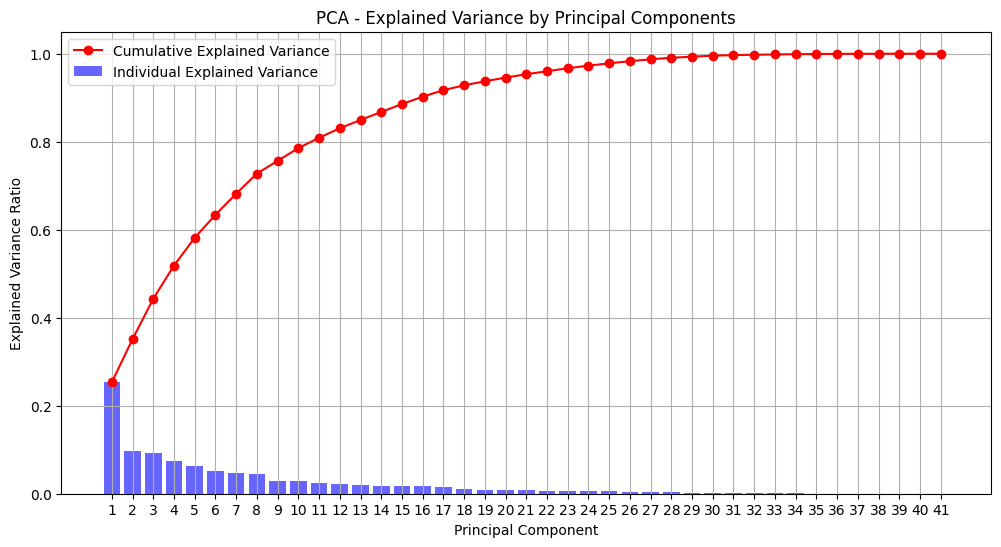

In [189]:
# Step 1: Select only numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
numeric_data = train_data[numeric_columns]


# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


# Step 3: Apply PCA
pca = PCA()
pca.fit(scaled_data)


# Step 4: Analyze the results
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


# Create a DataFrame to hold the explained variance
explained_variance_df = pd.DataFrame({
    'Principal Component': np.arange(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})


# Print explained variance
print(explained_variance_df)


# Step 5: Visualize explained variance
plt.figure(figsize=(12, 6))


plt.bar(
    explained_variance_df['Principal Component'],
    explained_variance_df['Explained Variance'],
    alpha=0.6,
    color='b',
    label='Individual Explained Variance'
)


plt.plot(explained_variance_df['Principal Component'], explained_variance_df['Cumulative Variance'],
         marker='o', color='r', label='Cumulative Explained Variance')
plt.title('PCA - Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance_df) + 1))
plt.legend()
plt.grid()
plt.show()

### Choosing the Number of Components

From our cumulative variance, it appears that:

- The first 5 components capture approximately 55% of the variance.
- The first 10 components capture about 79% of the variance.
- To achieve over 90% variance, we'll need around 15-20 components.

Given this analysis, we can proceed with 15/20 components for PCA, as this allows for a good balance between dimensionality reduction and the retention of information.


# **Feature Engineering**


In [ ]:
def generate_features(df):
    # Duration
    # train_data['duration'] = train_data['Ltime'] - train_data['Stime']

    # Ratios
    train_data['byte_ratio'] = train_data['sbytes'] / \
        (train_data['dbytes'] + 1)
    train_data['pkt_ratio'] = train_data['spkts'] / (train_data['dpkts'] + 1)
    train_data['load_ratio'] = train_data['sload'] / (train_data['dload'] + 1)
    train_data['jit_ratio'] = train_data['sjit'] / (train_data['djit'] + 1)
    train_data['inter_pkt_ratio'] = train_data['sinpkt'] / \
        (train_data['dinpkt'] + 1)
    train_data['tcp_setup_ratio'] = train_data['tcprtt'] / \
        (train_data['synack'] + train_data['ackdat'] + 1)

    # Aggregate Features
    train_data['total_bytes'] = train_data['sbytes'] + train_data['dbytes']
    train_data['total_pkts'] = train_data['spkts'] + train_data['dpkts']
    train_data['total_load'] = train_data['sload'] + train_data['dload']
    train_data['total_jitter'] = train_data['sjit'] + train_data['djit']
    train_data['total_inter_pkt'] = train_data['sinpkt'] + train_data['dinpkt']
    train_data['total_tcp_setup'] = train_data['tcprtt'] + \
        train_data['synack'] + train_data['ackdat']

    # Interaction Features
    train_data['byte_pkt_interaction_src'] = train_data['sbytes'] * \
        train_data['spkts']
    train_data['byte_pkt_interaction_dst'] = train_data['dbytes'] * \
        train_data['dpkts']
    train_data['load_jit_interaction_src'] = train_data['sload'] * \
        train_data['sjit']
    train_data['load_jit_interaction_dst'] = train_data['dload'] * \
        train_data['djit']
    train_data['pkt_jit_interaction_src'] = train_data['spkts'] * \
        train_data['sjit']
    train_data['pkt_jit_interaction_dst'] = train_data['dpkts'] * \
        train_data['djit']

    # Statistical Features
    train_data['mean_pkt_size'] = train_data['smean'] + train_data['dmean']
    train_data['tcp_seq_diff'] = train_data['stcpb'] - train_data['dtcpb']

    return train_data

In [191]:
generate_features(train_data)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,total_inter_pkt,total_tcp_setup,byte_pkt_interaction_src,byte_pkt_interaction_dst,load_jit_interaction_src,load_jit_interaction_dst,pkt_jit_interaction_src,pkt_jit_interaction_dst,mean_pkt_size,tcp_seq_diff
0,1,0.121478,tcp,others,FIN,6,4,258,172,74.087490,...,32.670600,0.000000,1548,688,4.272821e+05,1.005053e+05,181.065282,47.322416,86,-1580760939
1,2,0.649902,tcp,others,FIN,14,38,734,42014,78.473372,...,65.347865,0.000000,10276,1596532,5.156860e+05,6.988454e+08,859.977076,52735.576540,1158,-1659503825
2,3,1.623129,tcp,others,FIN,8,16,364,13186,14.170161,...,334.612774,0.223794,2912,210976,2.701098e+07,6.958682e+08,137436.694880,182734.819680,870,-846964266
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,243.112273,0.000000,7536,9240,7.099260e+05,1.676552e+07,3108.962064,59901.416028,116,59676287
4,5,0.449454,tcp,others,FIN,10,6,534,268,33.373826,...,123.409935,0.256762,5340,1608,2.068319e+07,4.617294e+05,24158.376340,694.842000,98,458983359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,0.009000,0.000000,228,0,0.000000e+00,0.000000e+00,0.000000,0.000000,57,0
175337,175338,0.505762,tcp,others,FIN,10,8,620,354,33.612649,...,121.380681,0.198880,6200,2832,3.284322e+07,5.892905e+05,37210.687860,961.421816,106,65683830
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,0.009000,0.000000,228,0,0.000000e+00,0.000000e+00,0.000000,0.000000,57,0
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,0.009000,0.000000,228,0,0.000000e+00,0.000000e+00,0.000000,0.000000,57,0


In [192]:
dataset1 = train_data.copy()
dataset2 = train_data.copy()

In [193]:
label_encoder = LabelEncoder()
ohe = OneHotEncoder()

In [ ]:
train_data['attack_cat'] = label_encoder.fit_transform(
    train_data['attack_cat'])

In [ ]:
label_mapping = dict(
    zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)

Label Mapping:
{'Analysis': 0, 'Backdoor': 1, 'DoS': 2, 'Exploits': 3, 'Fuzzers': 4, 'Generic': 5, 'Normal': 6, 'Reconnaissance': 7, 'Shellcode': 8, 'Worms': 9}
